[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aoguedao/math685_numerical_analysis/blob/main/assigments/hwk03.ipynb)

# MATH685 - Homework #03

_Alonso Ogueda_

## Exercise 6

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# x = np.array([0, 1, 2, 3])
# y = np.array([0, 0.5, 2, 1.5])
# dy_0 = 0.2
# dy_n = -1

In [41]:
x = np.array([1, 2, 5, 6, 7, 8, 10, 13, 17])
y = np.array([3.0, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5])
dy_0 = 1
dy_n = -0.667

In [42]:
h = np.ediff1d(x)
mu = []
for i in range(len(h) - 1):
    mu_i = h[i] / (h[i] + h[i + 1])
    mu.append(mu_i)
mu = np.array(mu)
lam = 1 - mu


In [50]:
d = []
for i in range(1, len(x) - 1):
    f01 = (y[i] - y[i - 1]) / (x[i] - x[i - 1])
    f12 = (y[i + 1] - y[i]) / (x[i + 1] - x[i])
    f012 = (f12 - f01) / (x[i + 1] - x[i - 1])
    d.append(f012)

d = np.array(d) * 6

In [44]:
d0 = 6 / h[0] * ((y[1] - y[0]) / (x[1] - x[0]) - dy_0 )
dn = 6 / h[-1] * ( dy_n - (y[-1] - y[-2]) / (x[-1] - x[-2]) )


In [45]:
d = np.hstack([d0, d, dn])
mu = np.hstack([mu, 1])
lam = np.hstack([1, lam])

In [46]:
A = 2 * np.identity(len(d)) + np.diagflat(lam, k = 1) + np.diagflat(mu, k = -1)
z = np.linalg.solve(A, d)

In [47]:
def spline_function(x, x1, x2, y1, y2, z1, z2, h):
    x = np.asarray(x)
    s = (
        np.power((x2 - x), 3) * z1 / (6 * h)
        + np.power((x - x1), 3) * z2 / (6 * h)
        + (y1 - (z1 * h ** 2) / 6) * (x2 - x) / h
        + (y2 - (z2 * h ** 2) / 6) * (x - x1) / h
    )
    return s

In [48]:
x_array = []
s = []
for i in range(1, len(x)):
    x_array_i = np.linspace(x[i - 1], x[i], 100)
    s_i = spline_function(
        x=x_array_i,
        x1=x[i - 1],
        x2=x[i],
        y1=y[i - 1],
        y2=y[i],
        z1=z[i - 1],
        z2=z[i],
        h=h[i-1]
    )
    x_array.append(x_array_i)
    s.append(s_i)

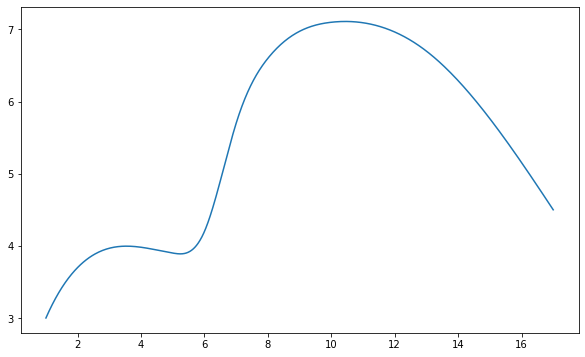

In [49]:
## Ploting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.hstack(x_array), np.hstack(s))

#     axs[i].set_ylabel("y")
#     axs[i].grid()
#     axs[i].set_title(f"{n} terms")
# axs[-1].set_xlabel("x")
# fig.suptitle(r"Taylor approximation of $I(x)$ about $x_0 = 0$") 
# fig.tight_layout()
# plt.savefig(images_path / "exercise07.png", dpi=300)
fig.show()